In [1]:
# Importing libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.pipeline import Pipeline

In [3]:
# Loding data set 

data = pd.read_csv("Titanic-Dataset.csv")[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]

In [4]:
data.sample(5) # lokking data randomely

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
804,1,3,male,27.0,0,0,6.9750,S
483,1,3,female,63.0,0,0,9.5875,S
105,0,3,male,28.0,0,0,7.8958,S
226,1,2,male,19.0,0,0,10.5000,S
777,1,3,female,5.0,0,0,12.4750,S


In [5]:
data.info() # information of the eqch columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
data.describe() # statical analysis

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
corr_matrix = data.select_dtypes(include = "number").corr()
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

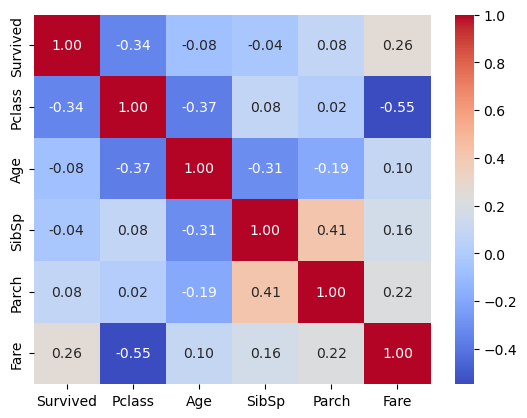

In [8]:
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

In [9]:
(data.isnull().sum() / len(data)) # Looking the null values in the columns

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

### I can find the null valuse in the columns are Age,Cabin and Embarked

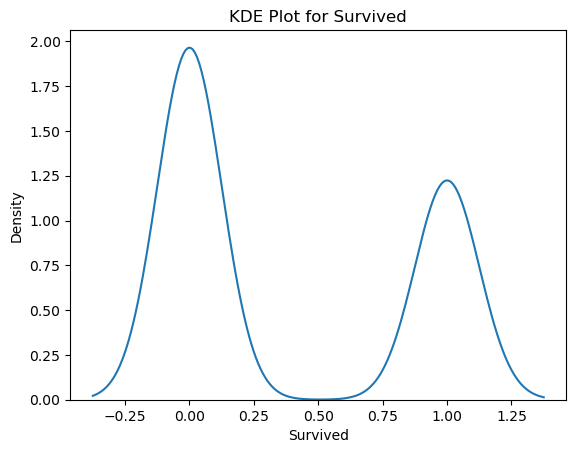

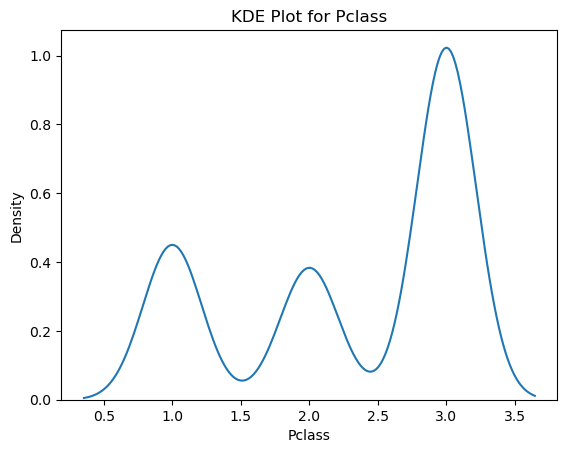

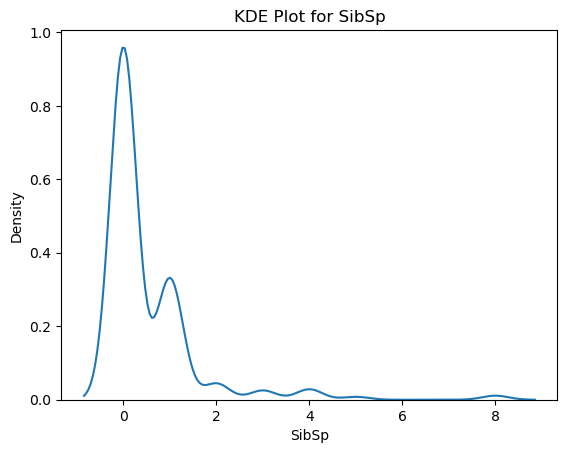

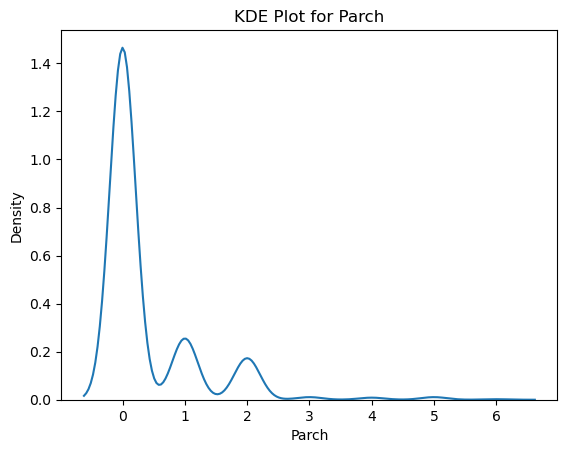

In [10]:
#plotating the kde plot to look skwe

for col in data.select_dtypes(include='int').columns:
    sns.kdeplot(data=data, x=col)
    plt.title(f"KDE Plot for {col}")  
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

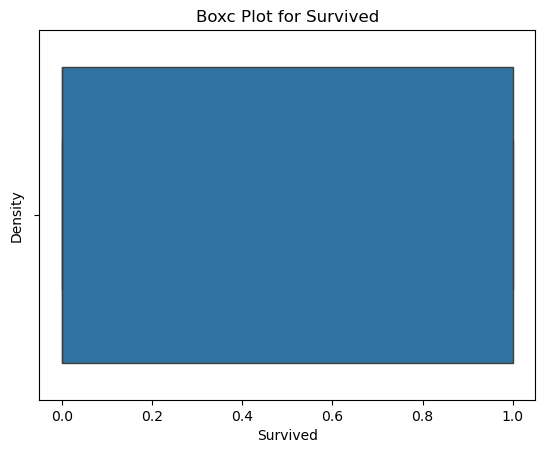

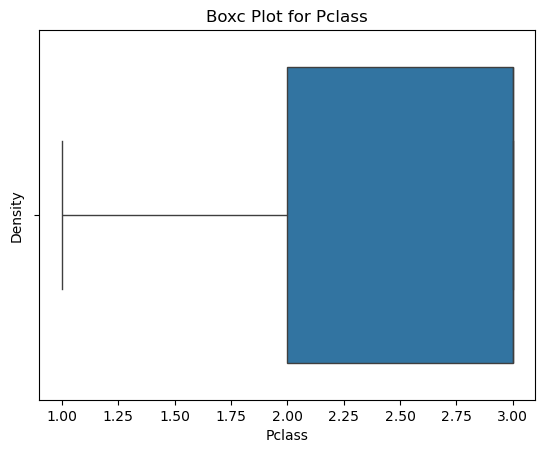

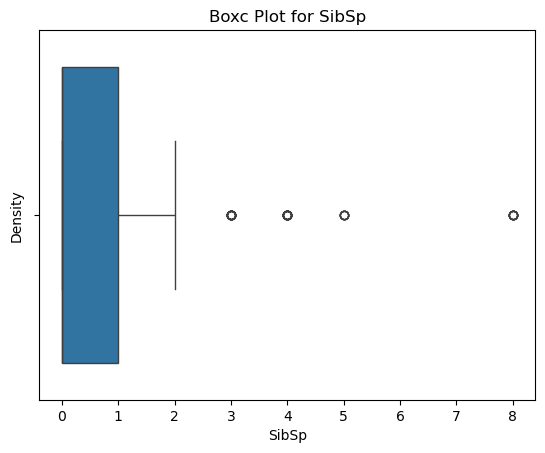

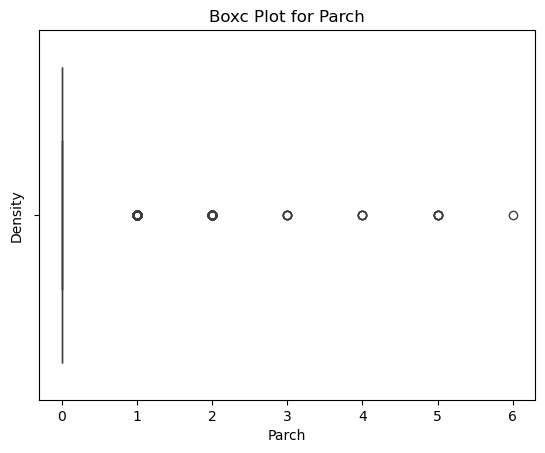

In [11]:
#plotating the box plot to look outiler

for col in data.select_dtypes(include='int').columns:
    sns.boxplot(data=data, x=col)
    plt.title(f"Boxc Plot for {col}")  
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

In [12]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


<Axes: ylabel='Fare'>

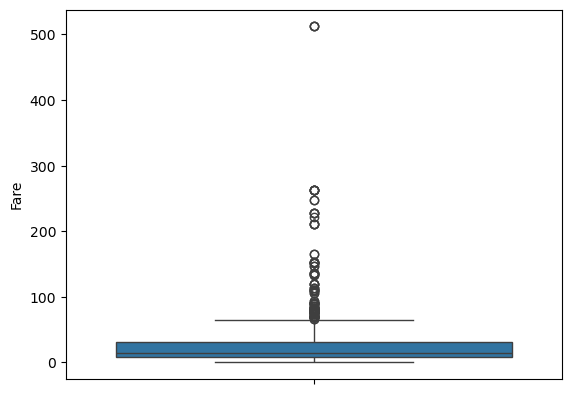

In [13]:
sns.boxplot(data["Fare"])

<Axes: ylabel='Age'>

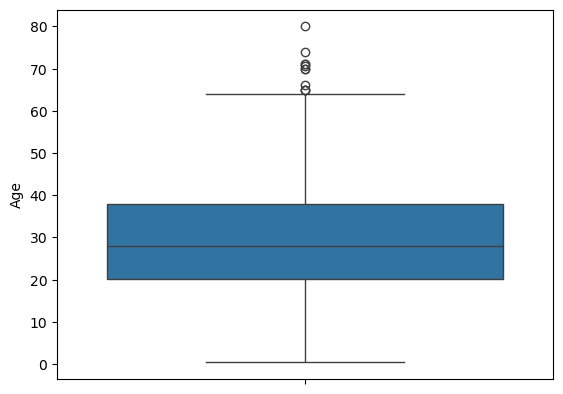

In [14]:
sns.boxplot(data["Age"])

In [15]:
def Z_score(col):
    # Define the upper and lower bounds using Z-score method (±3 standard deviations from mean)
    upper_bound = data[col].mean() + 3 * data[col].std()
    lower_bound = data[col].mean() - 3 * data[col].std()
    
    # Cap values outside the Z-score range
    # Values below the lower bound are set to lower_bound
    # Values above the upper bound are set to upper_bound
    data[col] = np.where(
        data[col] < lower_bound, lower_bound,
        np.wheredata1[col] > upper_bound, upper_bound, data[col])
    

In [16]:
def iqr_range(col):
    # Calculate the first and third quartiles of the column
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values below the lower bound and above the upper bound
    # Values below are set to lower_bound, above are set to upper_bound
    data[col] = np.where(
        data[col] < lower_bound, lower_bound,
        np.where(data[col] > upper_bound, upper_bound, data[col])
    )

In [17]:
importance_col = ["Age","Fare"]

In [18]:
# Handling the outler in the Fare Column


In [19]:
for i in importance_col:
    iqr_range(i)

<Axes: ylabel='Age'>

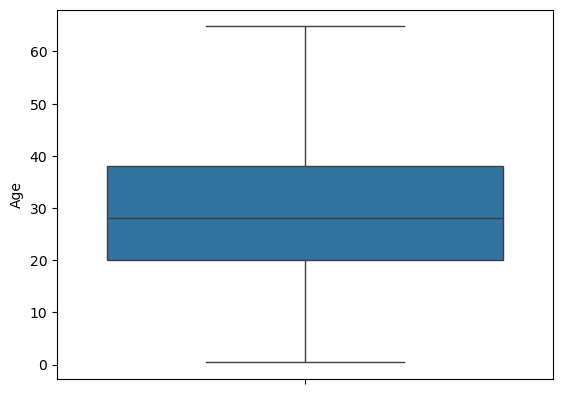

In [20]:
# After handling the outiler 
sns.boxplot(data["Age"])

<Axes: ylabel='Fare'>

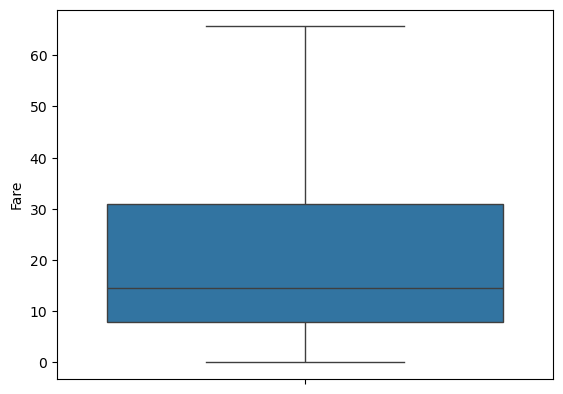

In [21]:
# After handling the outiler 

sns.boxplot(data["Fare"])

In [22]:
data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6344,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [23]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [24]:
x_train,y_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
cf = ColumnTransformer(transformers=[
    ("impute",KNNImputer(n_neighbors=5,weights="distance"),[2,4]),
    ("mode",SimpleImputer(strategy="most_frequent"),[6])
],remainder="passthrough")

In [26]:
cf1 = ColumnTransformer([
    ("ohe_sex_embarked", OneHotEncoder(handle_unknown="ignore", sparse_output=False), [1, 6])
], remainder="passthrough")

In [27]:
cf2 = ColumnTransformer([
    ("scale", MinMaxScaler(), slice(0, 10))
])

In [28]:
pipe = Pipeline([
    ('cf',cf),
    ('cf1', cf1),
    ('cf2', cf2),
])

In [29]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('cf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute',
                                                  KNNImputer(weights='distance'),
                                                  [2, 4]),
                                                 ('mode',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('cf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('cf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))]))])